## CREDIT CARD FRAUD DETECTION

Build a model to detect fraudulent credit card transactions. Use a dataset containing information about credit card transactions, and experiment with algorithms like Logistic Regression, Decision Trees, or Random Forests to classify transactions as
fraudulent or

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

In [14]:
data_train=pd.read_csv("fraudTrain.csv")
data_test=pd.read_csv("fraudTest.csv")

In [15]:
full_data=pd.concat([data_train, data_test])
full_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [16]:
full_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

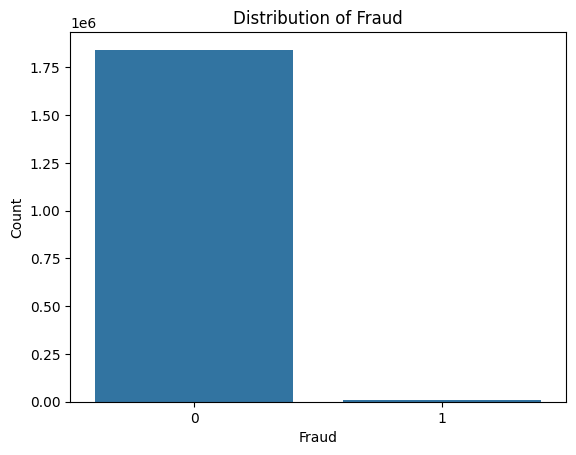

In [17]:
fraud_counts=full_data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

## data pre-processing

In [18]:
fraud=full_data[full_data["is_fraud"]==1]
not_fraud=full_data[full_data["is_fraud"]==0]
print(fraud.shape[0])
print(not_fraud.shape[0])

9651
1842743


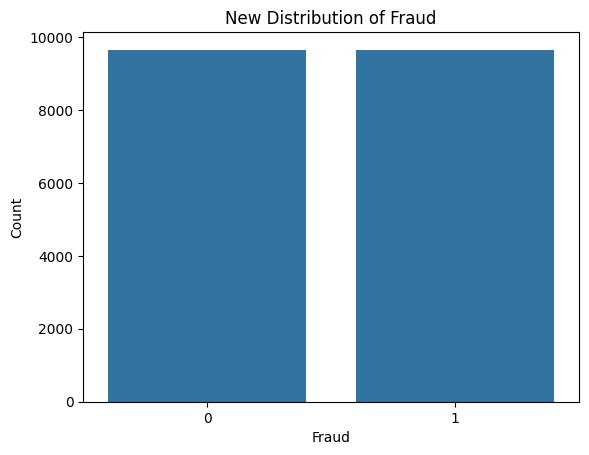

In [19]:
not_fraud=not_fraud.sample(fraud.shape[0])
data=pd.concat([fraud,not_fraud])
fraud_counts=data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index,y=fraud_counts.values)
plt.title('New Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [20]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [21]:
unused_cols=['Unnamed: 0','first','last','unix_time','street','gender','job','dob','city','state','trans_num','merchant']
data.drop(columns=unused_cols,inplace=True)

In [22]:
data.head()

,trans_date_trans_time,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
2449,2019-01-02 01:06:37,4613314721966,grocery_pos,281.06,28611,35.9946,-81.7266,885,36.430124,-81.179483,1
2472,2019-01-02 01:47:29,340187018810220,gas_transport,11.52,78208,29.4400,-98.4590,1595797,29.819364,-99.142791,1
2523,2019-01-02 03:05:23,340187018810220,grocery_pos,276.31,78208,29.4400,-98.4590,1595797,29.273085,-98.836360,1
2546,2019-01-02 03:38:03,4613314721966,gas_transport,7.03,28611,35.9946,-81.7266,885,35.909292,-82.091010,1
2553,2019-01-02 03:55:47,340187018810220,grocery_pos,275.73,78208,29.4400,-98.4590,1595797,29.786426,-98.683410,1


In [31]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['trans_day']=data['trans_date_trans_time'].dt.day
data['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_minute']=data['trans_date_trans_time'].dt.minute
data.drop(columns=['trans_date_trans_time'],inplace=True)

In [34]:
encoder=LabelEncoder()
data['category']=encoder.fit_transform(data['category'])
data['cc_num']=encoder.fit_transform(data['cc_num'])

In [35]:
data.head()

,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute
2449,126,4,281.06,28611,35.9946,-81.7266,885,36.430124,-81.179483,1,2,1,2019,1,6
2472,314,2,11.52,78208,29.4400,-98.4590,1595797,29.819364,-99.142791,1,2,1,2019,1,47
2523,314,4,276.31,78208,29.4400,-98.4590,1595797,29.273085,-98.836360,1,2,1,2019,3,5
2546,126,2,7.03,28611,35.9946,-81.7266,885,35.909292,-82.091010,1,2,1,2019,3,38
2553,314,4,275.73,78208,29.4400,-98.4590,1595797,29.786426,-98.683410,1,2,1,2019,3,55


In [36]:
scaler=StandardScaler()
data['amt']=scaler.fit_transform(data[['amt']])
data['zip']=scaler.fit_transform(data[['zip']])
data['city_pop']=scaler.fit_transform(data[['city_pop']])
data['cc_num']=encoder.fit_transform(data['cc_num'])

<Axes: >

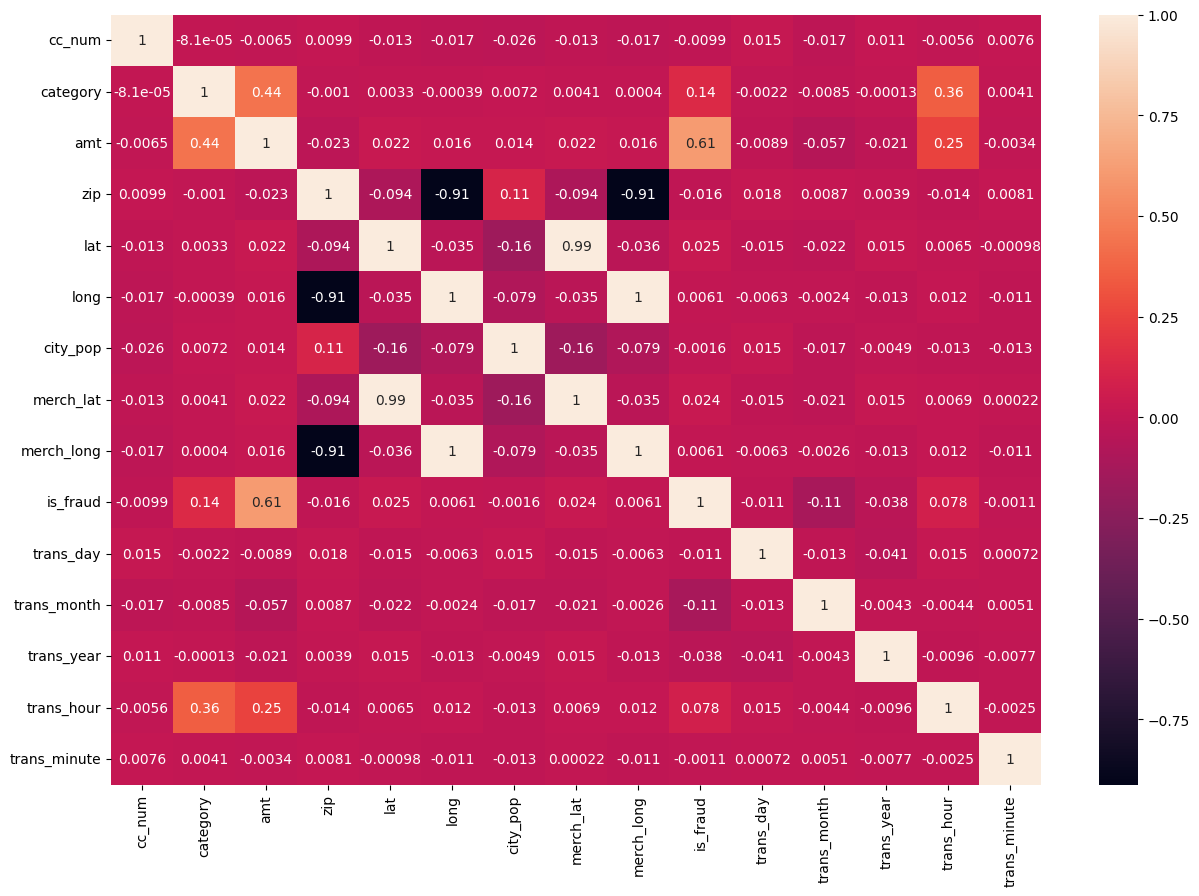

In [38]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

In [39]:
X=data.drop('is_fraud',axis=1)
y=data['is_fraud']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [41]:
RFC=RandomForestClassifier(random_state=0)
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

In [42]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Confusion matrix:',confusion_matrix(y_test, y_pred))

Accuracy: 0.9678839678839679
Precision: 0.9724722075172049
Recall: 0.9622839182818229
F1 score: 0.9673512374934176
Confusion matrix: [[1900   52]
 [  72 1837]]
